# Progres: TME3

Fabien Mathieu - fabien.mathieu@normalesup.org

Sébastien Tixeuil - Sebastien.Tixeuil@lip6.fr

**Note :**

- The starred exercises (indicated by *) must be done only if all other exercises have been done. You do not have to do them to get a score of 20/20.

- stackoverflow is your friend... But if you use something you find on the Internet, you have to cite your source AND add explanations. If you copy/paste something without explanation, you won't get the maximum score even if it works!

- The examples given are just examples, you are not obliged to display exactly the same thing.

# TME3 objective

The goal of TME3 is to simulate a distributed hash table based on Chord. *Simulating* means that we won't go to the *prototype*, but only look at the interesting mechanisms in the context of a DHT: building routing tables, insertions, etc...

Concretely, we'll ignore all the problems related to the network implementation itself (launching independent clients in VMs, managing network connections, ...) and run everything centrally assuming that the primitives exist, and trying not to call primitives as if they came from peers.

**Note:** Normally, after this TME, you will have all the basic notions to make a more realistic implementation of Chord, typically at the mini-project level.

We will reproduce the table example given in the course.

The cell below is just to display the Chord ring. No need to evaluate it!

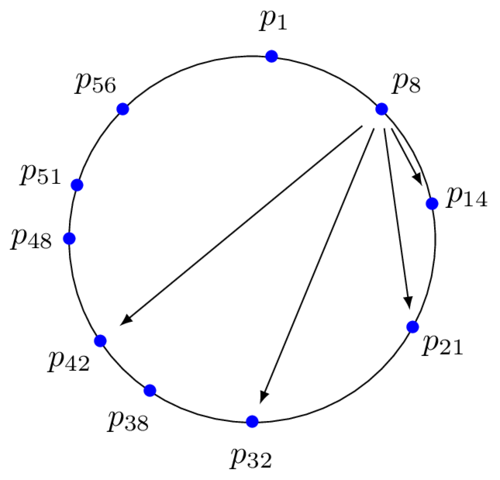

In [100]:
%%tikz --size 500,500
\draw (0,0) circle (2) ;
\foreach \n/\a in {1/84,8/45,14/11,21/331,32/270,38/236,42/214,48/180,51/163,56/135}
{\node[blue] (\n) at (\a:2) {$\bullet$} ;
\node (p\n) at (\a:2.4) {$p_{\n}$} ;}
\draw[->,>=latex] (8) edge (14) edge (21) edge (32) edge (42);

For simplicity, we will identify a peer and its key. In particular, if you know the key of a peer, you can contact him. In real life, of course, you also need a real IP address or something like that. For example, $p_{38}$ is represented by something like (name: mymachine, ip: 129.199.129.1, hash: 38, ...). For the TME, we'll settle for 38.

# Exercise 1: centralized building

To start with, we assume a complete knowledge of the network and build the different routing tables.

We assume that we have an already populated and functional DHT. The size of the key space is 64 and we have access to the peer list.

In [57]:
Nmax = 64
peers = [1, 8, 14, 21, 32, 38, 42, 48, 51, 56]

### Question 1.1

Write a successor function that returns the successor of a key, and a predecessor function.

Be careful, we are not trying to do Chord yet, it is just about giving the answer from the complete knowledge of the system.

Typically, with these functions, you should be able to write:

In [58]:
[successor(k, peers) for k in [30, 42, 60]]

[32, 48, 1]

In [10]:
[predecessor(k, peers) for k in [37, 1]]

[32, 56]

**Answer:**

### Question 1.2

Write a function that returns a dictionary associating to each peer its own key, its successor, its predecessor and its finger table.

As before, you can use the complete knowledge of the system.

In [61]:
dht = make_dht(peers)
dht

{1: {'key': 1, 'next': 8, 'prev': 56, 'finger': [8, 14, 21, 38]},
 8: {'key': 8, 'next': 14, 'prev': 1, 'finger': [14, 21, 32, 42]},
 14: {'key': 14, 'next': 21, 'prev': 8, 'finger': [21, 32, 48]},
 21: {'key': 21, 'next': 32, 'prev': 14, 'finger': [32, 38, 56]},
 32: {'key': 32, 'next': 38, 'prev': 21, 'finger': [38, 42, 51, 1]},
 38: {'key': 38, 'next': 42, 'prev': 32, 'finger': [42, 48, 56, 8]},
 42: {'key': 42, 'next': 48, 'prev': 38, 'finger': [48, 51, 1, 14]},
 48: {'key': 48, 'next': 51, 'prev': 42, 'finger': [51, 56, 1, 21]},
 51: {'key': 51, 'next': 56, 'prev': 48, 'finger': [56, 1, 8, 21]},
 56: {'key': 56, 'next': 1, 'prev': 51, 'finger': [1, 14, 32]}}

**Answer:**

# Exercise 2: using Chord 

You should now have correctly configured Chord routing tables. 

### Question 2.1

Test whether a peer $i$ is in charge of a key $k$. This function must be executed from the peer's point of view, i.e. using only the data owned by $i$.

In [16]:
i = 1; k = 56
isincharge(dht[i], k)

True

In [17]:
k = 55
isincharge(dht[i], k)

False

In [18]:
i = 38
[k for k in range(Nmax) if isincharge(dht[i], k)]

[32, 33, 34, 35, 36, 37]

**Answer:**

### Question 2.2

Write a key search function, which will return the route to reach the peer responsible for a key.

In [20]:
lookup(8, 54, dht)

[8, 42, 51, 56]

In [21]:
lookup(42, 14, dht)

[42, 14, 21]

In [22]:
lookup(42, 21, dht)

[42, 14, 21, 32]

**Answer:**

# Exercise 3: decentralized building 

Starting with a full table it is easy. Let's start from the beginning, with a single even number, 1.

In [66]:
dht2 = {1: {'key': 1, 'next': 1, 'prev': 1, 'finger': []}}

The routing is very minimalist for the moment...

In [24]:
lookup(1,42, dht2)

[1]

### Question 3.1

Given a peer $p$ and a set of peers, construct a finger table for $p$. Note: a peer should never return to its own routing table, and the table must not contain duplicates.

In [27]:
build_finger(15, [1, 3, 60, 32, 7, 15, 45, 22, 60])

[22, 32, 60]

In [28]:
build_finger(42, [1, 56, 42])

[56, 1]

**Answer:**

### Question 3.2

Write a function to insert a peer as seen in course, using 1 as the insertion point.

Insert peers 8, 14, ... in the order you want

- Do you have a working table?
- How complete is it? (compare with Exercise 1)

**Réponse :**

### Question 3.3*

Propose solutions to have more complete tables.

**Answer:**

# Exercise 4: to go further*

### Question 4.1*

Manage the clean departure of a peer.

**Answer:**

### Question 4.2*

Use a larger key space (e.g. 32 bits), and insert more peers (10000).

**Answer:**

### Question 4.3*

Generate 100,000 keys and study their distribution over the 10,000 peers:
- How many keys are managed at most by a peer?
- Draw a curve that gives the number of peers that have $x$ keys (as a function of $x$).

**Answer:**

### Question 4.4*

Compute 100 *lookup* from random keys and peers:
- What is the maximum lookup length?
- Draw a curve that gives the number of lookups of length $x$ (as a function of $x$).

**Answer:**